In [6]:
import pandas as pd
import csv
import numpy as np
from scipy.stats import iqr
import re
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
data = pd.read_csv("stroopdata.csv")

## Question 1: Identify variables in the experiment
* independent variable: if the words are correctly color coded 
* dependent variable: time required to read 25 colored words

## Question 2a: Establish hypotheses
$ \mu_c$: The population mean of the time required to read correctly coded words ;
$ \mu_I$: The population mean of the time required to read wrongly coded words

* $H_0$: The population mean of the time differences in reading correctly and wrongly coded words ($\mu_c-\mu_I$) is 0:  $ \mu_c - \mu_I = 0 $

* $H_a$: The population mean of the time differences in reading correctly and wrongly coded words ($\mu_c-\mu_I$) is not 0:
$ \mu_c - \mu_I \neq 0 $

## Question 2b: Establish a statistical test
Due to the reasons:
1. We have less than 30 samples.
2. We don't know the standard deviation of the population.

We can only use t-test but not Z-test.

Also, because: 
1. This data (congruent and incongruent) are dependent sample (related measurement). 
2. Our alternative hypothesis is the times are different so it would be a two-tailed test. 

We can perform a paired two-tailed t-test.

Assumptions:
  1. The differences of the two sample times are approximately normally distributed.
  2. There is no outlier in the difference of the two sample times.

## Question 3: Report descriptive statistics
### measure of centrality
** median **

Congruent      14.36

Incongruent    21.02

** mean:**

Congruent      14.05

Incongruent    22.02

### measure of variability

Type|variance|standard deviation|interquartile range (IQR)
:---:|:---:|:---:|:---:
Congruent|12.67|3.56|4.31
Incongruent|23.01|4.80|5.33

## Question 4: Plot the data

(0, 8)

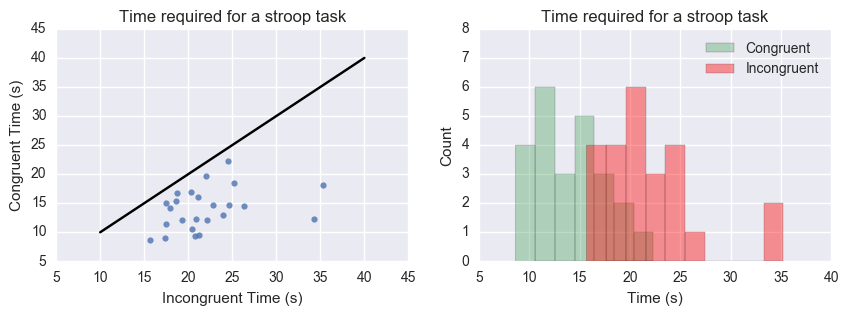

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
g=sns.regplot(x=data.Incongruent,y=data.Congruent,fit_reg=False,ax=ax1)
ax1.plot(range(10,45,5),range(10,45,5),color='k')
g.set(xlabel='Incongruent Time (s)')
g.set(ylabel='Congruent Time (s)')
g.set(title='Time required for a stroop task')

bin_incongruent = int(round((data.Incongruent.max()-data.Incongruent.min())/2))
bin_Congruent = int(round((data.Congruent.max()-data.Congruent.min())/2))
sns.distplot(data.Congruent,bins=bin_Congruent,kde=False,ax=ax2)
sns.distplot(data.Incongruent,bins=bin_incongruent,kde=False, color="r",ax=ax2)
plt.legend(['Congruent','Incongruent'])
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Time required for a stroop task')
plt.ylim([0,8])

**The scatter plot shows the time required for congruent and incongruent tasks of each person. The Black line shows the case that the two time are equal. All points are below the black line clearly demonstrate that it takes more time to accomplish incongruent tasks for everyone. We can also see that there are two people performed similarly as the others in the congruent task but needed much longer time in the incongruent task (about 35 s). Besides these two people, the other points show similar pattern as the black line, suggesting that people perform well in the congruent task can also perform well in the incongruent task.**

**The histogram clearly shows that the time required for incongruent tasks are longer than that for congruent tasks. The best people can achieve in the incongruent tasks is aorund the time of the worst gruop in the congruent task.**

## Question 5: Perform the statistical test and interpret your results

In [64]:
from scipy import stats
stats.ttest_rel(data.Congruent,data.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

**The result of t-test shows that the t value would be -8.02, which is larger than the t-critical value (2.069) of alpha=0.05. The probability that the null hypothesis is true is very low ($<<0.001$) so we can rejec the null hypothesis and say that the time required for congruent and incongruent tasks are significantly different. **

## Question 6: Digging deeper and extending the investigation
Hypotheses regarding the reasons for the effect observed are presented. An extension or related experiment to the performed Stroop task is provided, that may produce similar effects.

** I think the effect is due to our intuition of reading the words. In order to say the right color, you need to first force yourself to ignore the word (which is counterintuitive), then you identify the color, finally you find the word to express the color (while forcing yourself not to be affected by the written word). To ignore the written word is the most difficult part. But this can be improved by some practice.  If we perform the experiment on people don't understand English, then the time would be the same for congruent and incongruent tasks. **

** Another example about counterintuitive task required more time is reciting numbers (your phone number/social security number or any number that you have in your heart) in a language that you have good command of but not your mother tongue. **